<a href="https://colab.research.google.com/github/Krankile/ensemble_forecasting/blob/main/notebooks/weight_optimization/weights_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
%%capture
!pip install kora

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 


In [29]:
from kora import drive
drive.link_nbs()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

## Load data

In [10]:
ROOT = Path("/content/drive/MyDrive/Master, Ankile og Krange/Data")

In [12]:
mase_weights = pd.read_feather(ROOT / "LPsolutions/n-optimal ensemble/14_weights.feather") .set_index("index")

In [51]:
mase_weights["objective"].mean()

0.883409273808913

# Implement functions to plot weights and objective values

In [62]:
#The median is zero which makes sense, as more than 50% of the time a moethod is not used. This holds for all methods. 

def means_plotter(dfs):
    for df in dfs:
        mean_method = {}
        fig, ax = plt.subplots()
        for model_name in df.columns[:-1]:
            mean_method[model_name] = df[model_name].mean()
        
        sorted_mean_methods  = zip(*sorted(mean_method.items(), key=lambda tup: tup[1], reverse=True))
        
        plt.ylabel("Average weight",fontsize=16)
        plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
        
        plt.bar(*sorted_mean_methods, alpha=0.5)
        
    plt.show()

def model_counts_plotter(dfs): #Thought, correlation between objective value and amount of models used?
    for df in dfs:
        df_counts = df.iloc[:,:-1]
        
        fig, ax = plt.subplots()

        model_used_counts = df_counts.apply(lambda x: (x != 0).sum(), axis=1) 
        counter = Counter(model_used_counts)
        n, counts = zip(*counter.items())
        ax.set_xticks(n)

        
        plt.xlabel("Number of models in optimal ensemble",fontsize=16)
        plt.ylabel("% of optimal solutions",fontsize=16)

        counts = np.array(counts)/np.array(counts).sum()
        plt.bar(n,counts, alpha=0.5)
    plt.show() 


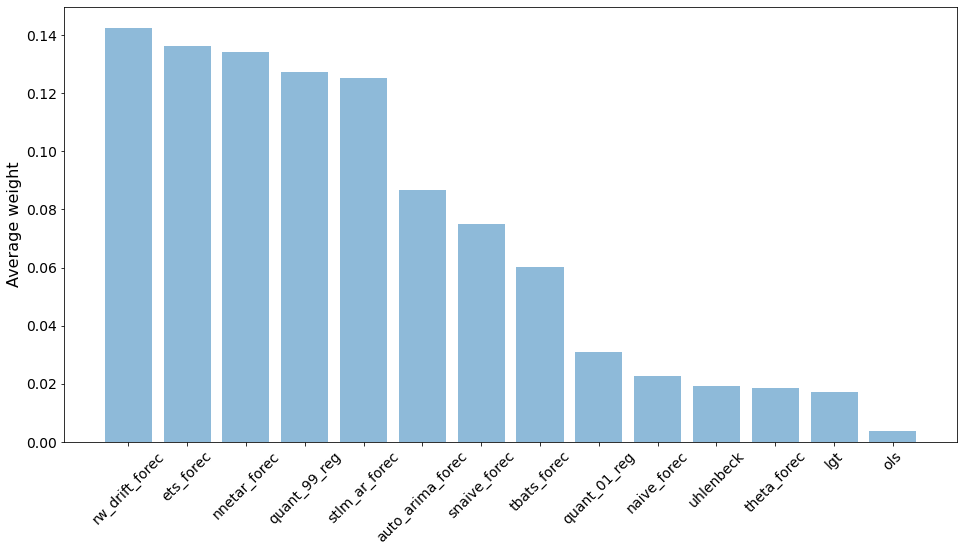

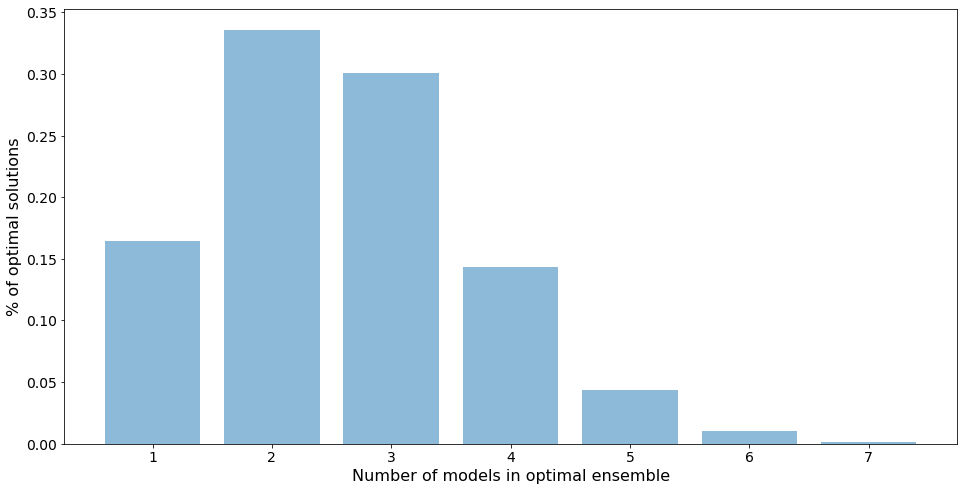

In [63]:
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["font.size"] = 14

means_plotter([mase_weights])
model_counts_plotter([mase_weights])